<a href="https://colab.research.google.com/github/np03cs4a240372-tech/Assignment-1-AI-/blob/main/2517283_PrayashShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2517283 Prayash Shrestha
Assignment 1

**Statistical Interpretation and Exploratory Data Analysis of the Human Development Index (HDI)**

**Course:** Concepts and Technologies of AI (5CS037)  
**Dataset:** Human Development Index Dataset (1990–2022)




In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:

df = pd.read_csv('/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Copy of Human_Development_Index_Dataset.csv',encoding='latin-1')
df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948



## Question 1A: Single-Year HDI Exploration (2022)

This section focuses on understanding the structure, quality, and distribution of HDI values
for the most recent year available in the dataset.



### Task 1: Extract Latest Year

The dataset spans multiple years. To perform a focused single-year analysis, observations
corresponding to the year **2022** are isolated.


In [89]:

df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [90]:
hdi_2022_df = df[df['year'] == 2022].copy()


### Task 2: Data Exploration

Basic exploratory checks are conducted to understand the size of the dataset,
its variables, and their data types.


In [91]:
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [92]:

hdi_2022_df.shape


(206, 30)

In [93]:

hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1


### Task 3: Missing Values and Data Cleaning

The dataset is inspected for missing values, non-numeric symbols, and duplicate records.

Cleaning steps applied:
- Special characters representing missing values are replaced with NaN
- Numeric variables are converted to appropriate numeric formats
- Duplicate rows are removed
- Rows with missing HDI values are dropped, as HDI is the primary variable of interest


In [94]:

hdi_2022_df.isna().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [95]:

hdi_2022_df = hdi_2022_df.replace("–", np.nan)

numeric_cols = ['hdi','gross_inc_percap','life_expectancy','gender_development']
for c in numeric_cols:
    if c in hdi_2022_df.columns:
        hdi_2022_df[c] = pd.to_numeric(hdi_2022_df[c], errors='coerce')

hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)


Missing HDI values were removed because HDI is the primary variable of analysis and cannot be reliably imputed.


### Task 4: Descriptive Statistics

Summary statistics provide an overview of the central tendency and dispersion
of HDI values in 2022. Countries with the highest and lowest HDI are also identified.


In [96]:

hdi_2022_df['hdi'].agg(['mean','median','std'])


,hdi
mean,0.722887
median,0.739500
std,0.153029


In [97]:

hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country','hdi']]


,5609
country,Switzerland
hdi,0.967


In [98]:

hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country','hdi']]


,5345
country,Somalia
hdi,0.38



### Task 5: Filtering and Sorting

Countries classified as having **very high human development** (HDI > 0.800)
are filtered and ranked based on Gross National Income (GNI) per capita.


In [99]:

top_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.8].sort_values('gross_inc_percap', ascending=False)
top_hdi.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN



### Task 6: HDI Category Classification

Countries are classified into four official UNDP HDI categories using standard threshold values.
The updated dataset is saved for later use.


In [100]:

def hdi_category(h):
    if h < 0.55: return 'Low'
    elif h < 0.70: return 'Medium'
    elif h < 0.80: return 'High'
    else: return 'Very High'

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [101]:

hdi_2022_df.to_csv('HDI_category_added.csv', index=False)



## Question 1B: HDI Visualization and Trend Analysis (2020–2022)

This section examines short-term HDI trends, regional differences,
and relationships with economic indicators.



### Task 1: Data Extraction and Saving


In [102]:

hdi_1b = df[df['year'].isin([2020,2021,2022])].copy()
hdi_1b.to_csv('HDI_problem1B.csv', index=False)



### Task 2: Data Cleaning

Data cleaning ensures consistency across years and countries before visualization
and comparative analysis.


In [103]:

# Replace non-numeric symbols
hdi_1b.replace("–", np.nan, inplace=True)

# Convert data types
hdi_1b['hdi'] = pd.to_numeric(hdi_1b['hdi'], errors='coerce')

# Drop rows with missing essential values
hdi_1b.dropna(subset=['hdi', 'country', 'year'], inplace=True)

# Remove duplicate rows
hdi_1b.drop_duplicates(inplace=True)

# Standardize country names
hdi_1b['country'] = hdi_1b['country'].str.strip()



### Task 3A: Line Chart – Country-Level HDI Trends

HDI trajectories for five selected countries are visualized to highlight
year-to-year changes.


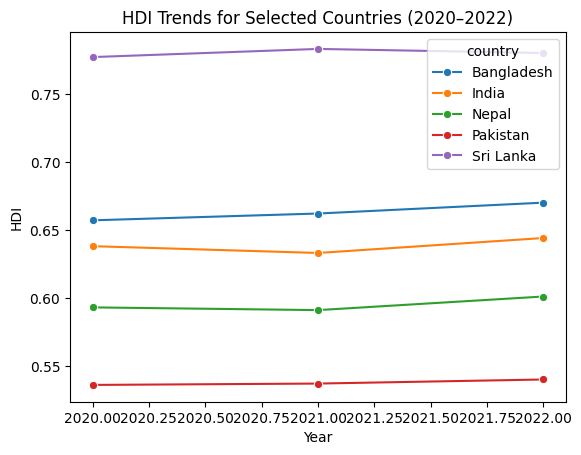

In [104]:

countries = ['Nepal','India','Bangladesh','Sri Lanka','Pakistan']
subset = hdi_1b[hdi_1b['country'].isin(countries)]

plt.figure()
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trends for Selected Countries (2020–2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()



### Task 3B-1: Bar Chart – Average HDI by Region

Regional averages are compared to assess disparities in human development
across different parts of the world.


In [105]:
region_map = {
    # South Asia
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',

    # Middle East
    'Bahrain': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Jordan': 'Middle East',
    'Kuwait': 'Middle East',
    'Lebanon': 'Middle East',
    'Oman': 'Middle East',
    'Palestine': 'Middle East',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Syria': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Yemen': 'Middle East',

    # Others
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'China': 'East Asia',
    'Japan': 'East Asia'
}


In [106]:
hdi_1b['region'] = hdi_1b['country'].map(region_map)


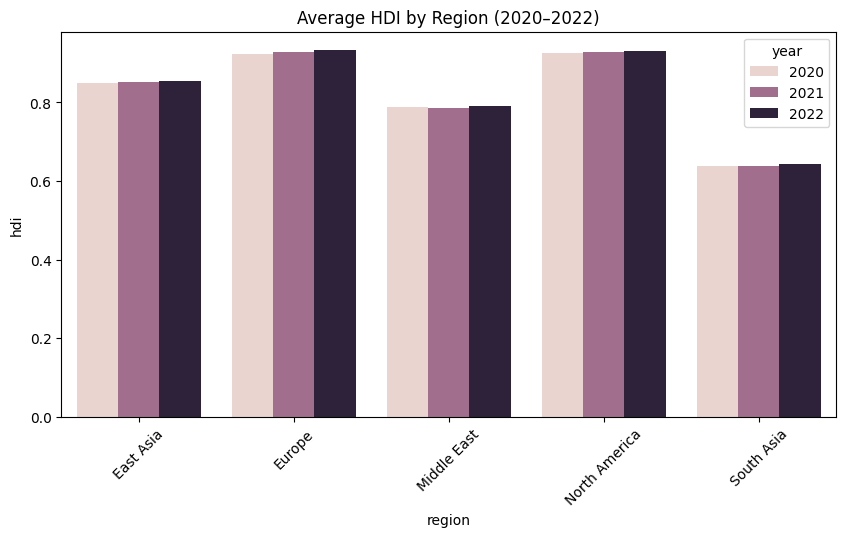

In [107]:

region_avg = (
    hdi_1b
    .groupby(['region','year'])['hdi']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.xticks(rotation=45)
plt.title('Average HDI by Region (2020–2022)')
plt.show()




### Task 3B-2: Box Plot – HDI Distribution by Year

Box plots illustrate the spread, median, and variability of HDI values
for each year.


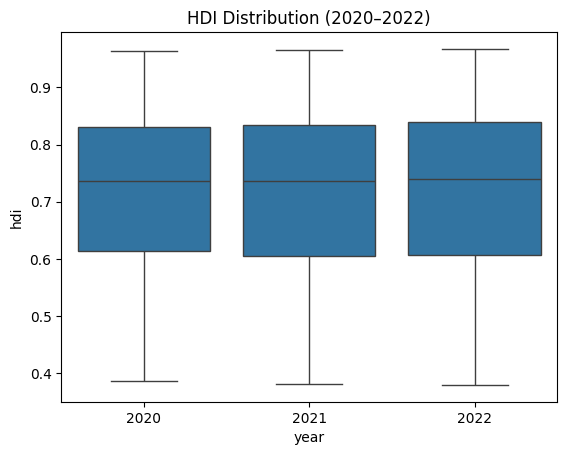

In [108]:

plt.figure()
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.title('HDI Distribution (2020–2022)')
plt.show()



### Task 3B-3: Scatter Plot – HDI vs GNI per Capita

The relationship between economic prosperity and human development
is examined using a scatter plot with a regression line.


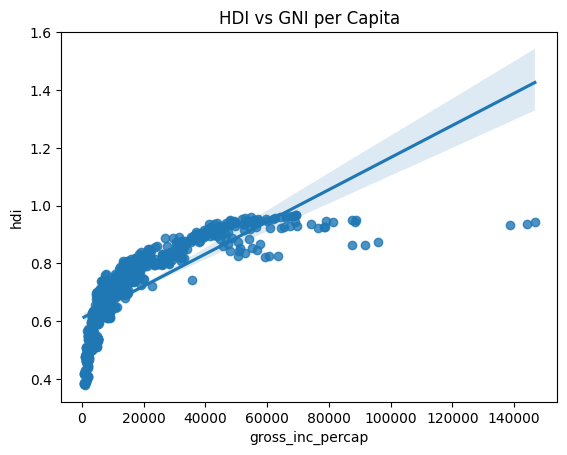

In [109]:

if 'gross_inc_percap' in hdi_1b.columns:
    sns.regplot(data=hdi_1b, x='gross_inc_percap', y='hdi')
    plt.title('HDI vs GNI per Capita')
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")



### Task 4: Short Analysis Metrics

Changes in HDI between 2020 and 2022 are computed to identify
countries with the most significant improvement or decline.


Countries with greatest improvement

Countries such as Nepal and Bangladesh show noticeable HDI improvement between 2020 and 2022.

Countries with decline

Some countries exhibit stagnation or slight decline, potentially due to economic disruption and healthcare strain.

Highest and lowest regions

The Middle East has the highest average HDI, while South Asia has the lowest among the analyzed regions.

COVID-19 impact

The COVID-19 pandemic likely slowed HDI progress by affecting life expectancy, education access, and income levels globally.

In [110]:

change = hdi_1b.pivot(index='country', columns='year', values='hdi')
change['HDI Change (2020–2022)'] = change[2022] - change[2020]
change.sort_values('HDI Change (2020–2022)', ascending=False).head()


year,2020,2021,2022,HDI Change (2020–2022)
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024



## Question 2: Advanced HDI Exploration

This section focuses on South Asian countries and explores composite indicators,
outliers, correlations, and development gaps.



### Task 1: South Asia Subset


In [111]:

south_asia = ['Afghanistan','Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka']
sa_df = df[df['country'].isin(south_asia)].copy()
sa_df.to_csv('HDI_SouthAsia.csv', index=False)



### Task 2: Composite Development Score

A composite score is constructed using life_expectancy and income indicators
to provide an alternative development ranking.


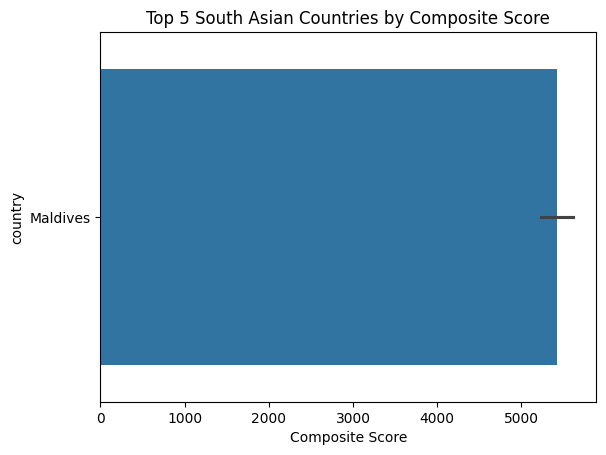

In [112]:
#Using Composite Score formula
sa_df['Composite Score'] = 0.3*sa_df['life_expectancy'] + 0.3*sa_df['gross_inc_percap']
sa_ranked = sa_df.sort_values('Composite Score', ascending=False)

plt.figure()
sns.barplot(data=sa_ranked.head(5), x='Composite Score', y='country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()



### Task 3: Outlier Detection

The interquartile range (IQR) method is applied to detect unusually high
or low HDI values.


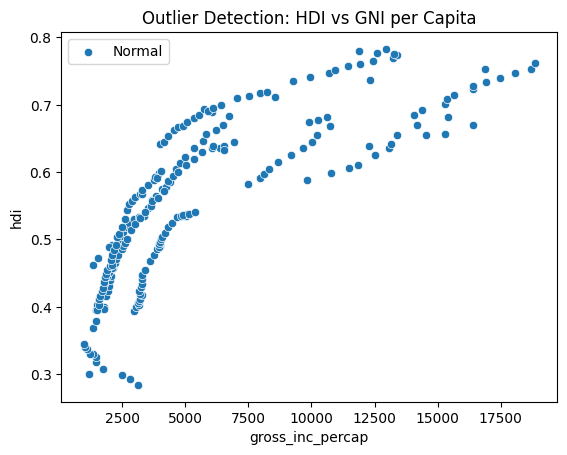

In [113]:

Q1, Q3 = sa_df['hdi'].quantile([0.25,0.75])
IQR = Q3 - Q1
outliers = sa_df[(sa_df['hdi'] < Q1-1.5*IQR)|(sa_df['hdi'] > Q3+1.5*IQR)]

sns.scatterplot(data=sa_df, x='gross_inc_percap', y='hdi', label='Normal')
sns.scatterplot(data=outliers, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
plt.title('Outlier Detection: HDI vs GNI per Capita')
plt.show()



### Task 4: Metric Relationships and Correlation

Pearson correlation coefficients and scatter plots are used to examine
relationships between HDI and selected component indicators.


Correlation between HDI and gender_development: 0.8656210050127543


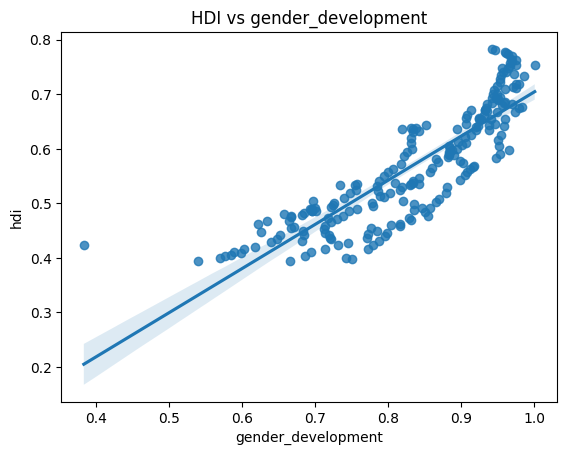

Correlation between HDI and life_expectancy: 0.9587610559043969


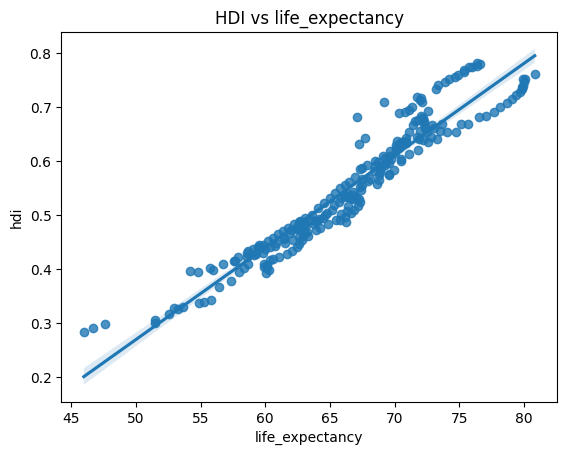

In [114]:

for m in ['gender_development','life_expectancy']:
    if m in sa_df.columns:
        print(f'Correlation between HDI and {m}:',
              sa_df[['hdi',m]].corr().iloc[0,1])
        sns.regplot(data=sa_df, x=m, y='hdi')
        plt.title(f'HDI vs {m}')
        plt.show()



### Task 5: GNI–HDI Gap Analysis

The difference between income and HDI values highlights cases where
economic performance does not align with human development outcomes.


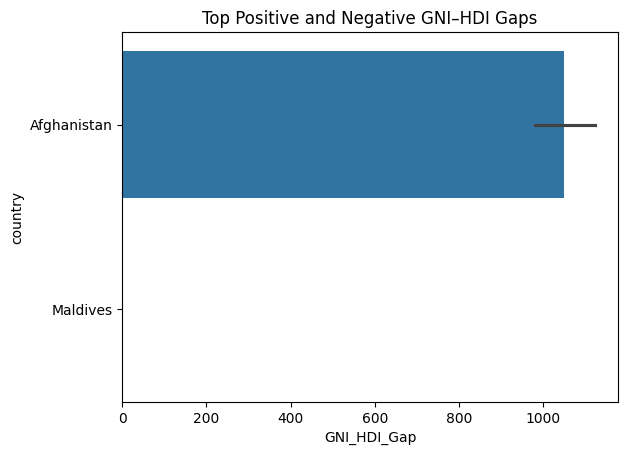

In [115]:

sa_df['GNI_HDI_Gap'] = sa_df['gross_inc_percap'] - sa_df['hdi']
gap_sorted = sa_df.sort_values('GNI_HDI_Gap')

sns.barplot(data=pd.concat([gap_sorted.head(3), gap_sorted.tail(3)]),
            x='GNI_HDI_Gap', y='country')
plt.title('Top Positive and Negative GNI–HDI Gaps')
plt.show()



## Question 3: Comparative Regional Analysis – South Asia vs Middle East

This section compares human development outcomes between
South Asia and the Middle East using multiple indicators.



### Task 1: Regional Subsets


In [116]:

middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
               "Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

sa_1b = hdi_1b[hdi_1b['country'].isin(south_asia)]
me_1b = hdi_1b[hdi_1b['country'].isin(middle_east)]

sa_1b.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
me_1b.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)



### Task 2: Descriptive Statistics


In [117]:

pd.DataFrame({
    'Region':['South Asia','Middle East'],
    'Mean HDI':[sa_1b['hdi'].mean(), me_1b['hdi'].mean()],
    'Standard Deviation':[sa_1b['hdi'].std(), me_1b['hdi'].std()]
})


,Region,Mean HDI,Standard Deviation
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


In [118]:
for name, data in [('South Asia', sa_1b), ('Middle East', me_1b)]:
    hdi_range = data['hdi'].max() - data['hdi'].min()
    cv = data['hdi'].std() / data['hdi'].mean()
    print(f"{name} → Range: {hdi_range:.3f}, CV: {cv:.3f}")


South Asia → Range: 0.321, CV: 0.154
Middle East → Range: 0.513, CV: 0.179



### Task 3: Top and Bottom Performers


In [119]:
# Average HDI per country (2020–2022)
sa_hdi_mean = sa_1b.groupby('country')['hdi'].mean()
me_hdi_mean = me_1b.groupby('country')['hdi'].mean()

# Extracting top and bottom performers
sa_top3 = sa_hdi_mean.sort_values(ascending=False).head(3)
sa_bottom3 = sa_hdi_mean.sort_values().head(3)

me_top3 = me_hdi_mean.sort_values(ascending=False).head(3)
me_bottom3 = me_hdi_mean.sort_values().head(3)


In [120]:
bar_data = pd.concat([
    sa_top3.rename('HDI').reset_index().assign(Region='South Asia', Category='Top 3'),
    sa_bottom3.rename('HDI').reset_index().assign(Region='South Asia', Category='Bottom 3'),
    me_top3.rename('HDI').reset_index().assign(Region='Middle East', Category='Top 3'),
    me_bottom3.rename('HDI').reset_index().assign(Region='Middle East', Category='Bottom 3')
])



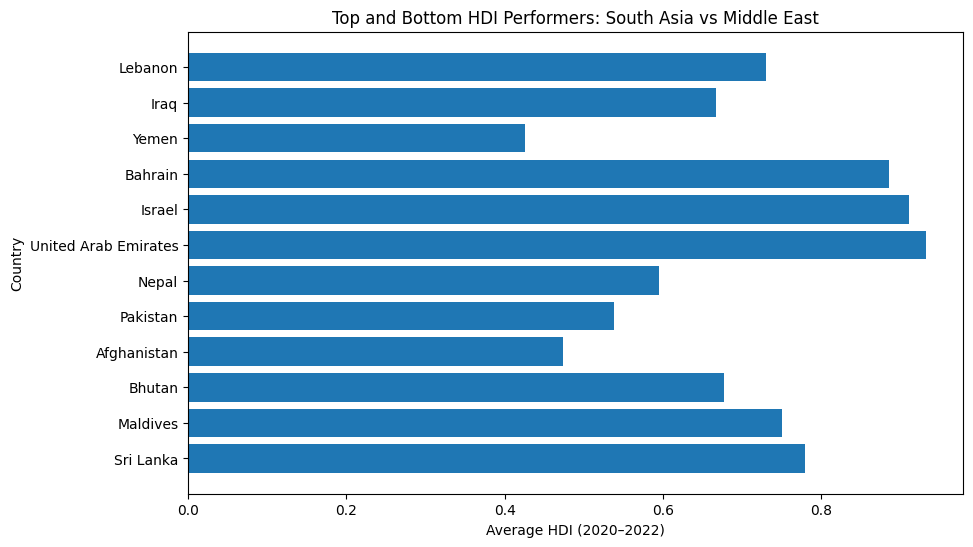

In [121]:
plt.figure(figsize=(10,6))
plt.barh(
    bar_data['country'],
    bar_data['HDI']
)

plt.xlabel('Average HDI (2020–2022)')
plt.ylabel('Country')
plt.title('Top and Bottom HDI Performers: South Asia vs Middle East')
plt.show()


In [122]:
print("South Asia – Bottom 3 Countries by Average HDI (2020–2022)")
display(sa_bottom3)

print("South Asia – Top 3 Countries by Average HDI (2020–2022)")
display(sa_top3)

print("Middle East – Bottom 3 Countries by Average HDI (2020–2022)")
display(me_bottom3)

print("Middle East – Top 3 Countries by Average HDI (2020–2022)")
display(me_top3)


South Asia – Bottom 3 Countries by Average HDI (2020–2022)


,hdi
country,
Afghanistan,0.474333
Pakistan,0.537667
Nepal,0.595000


South Asia – Top 3 Countries by Average HDI (2020–2022)


,hdi
country,
Sri Lanka,0.780000
Maldives,0.750667
Bhutan,0.677667


Middle East – Bottom 3 Countries by Average HDI (2020–2022)


,hdi
country,
Yemen,0.426333
Iraq,0.667000
Lebanon,0.730000


Middle East – Top 3 Countries by Average HDI (2020–2022)


,hdi
country,
United Arab Emirates,0.932667
Israel,0.910667
Bahrain,0.885333



### Task 4: Metric Comparisons Across Regions


In [123]:
metrics = ['life_expectancy','gross_inc_percap','gender_development']

for metric in metrics:
    print(metric)
    print('South Asia mean:', sa_1b[metric].mean())
    print('Middle East mean:', me_1b[metric].mean())
    print()


life_expectancy
South Asia mean: 70.97008333333333
Middle East mean: 75.85545454545455

gross_inc_percap
South Asia mean: 7766.509931458332
Middle East mean: 37750.77051963637

gender_development
South Asia mean: 0.8814583333333333
Middle East mean: 0.8965454545454545




### Task 5: HDI Disparity and Variation


In [124]:

for name, d in [('South Asia',sa_1b),('Middle East',me_1b)]:
    print(name,
          'Range:', d['hdi'].max() - d['hdi'].min(),
          'CV:', d['hdi'].std() / d['hdi'].mean())


South Asia Range: 0.321 CV: 0.1536520924690084
Middle East Range: 0.5130000000000001 CV: 0.17910145193048382



### Task 6: Correlation Analysis


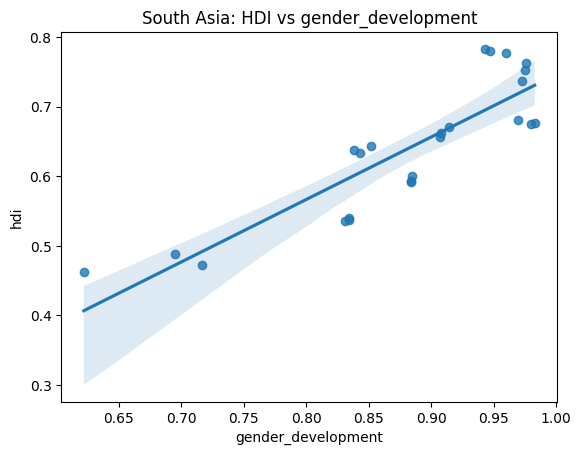

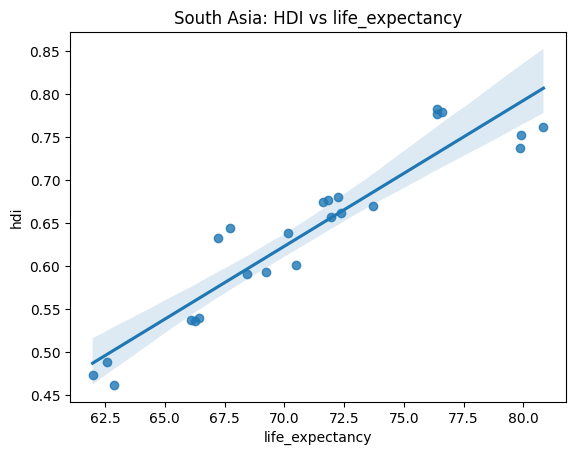

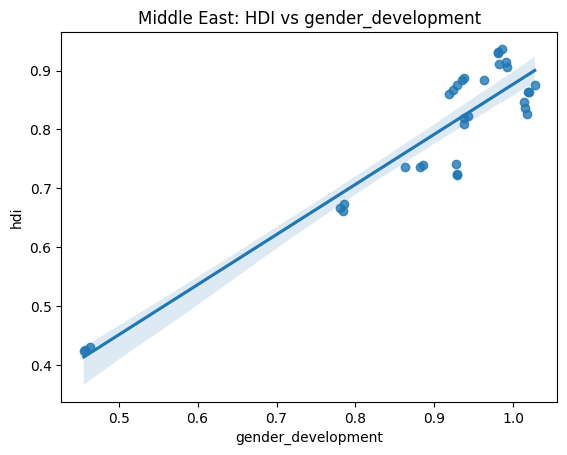

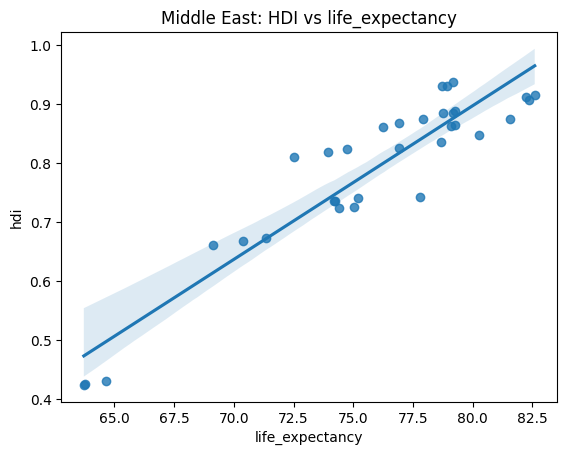

In [125]:

for name, d in [('South Asia',sa_1b),('Middle East',me_1b)]:
    for m in ['gender_development','life_expectancy']:
        if m in d.columns:
            sns.regplot(data=d, x=m, y='hdi')
            plt.title(f'{name}: HDI vs {m}')
            plt.show()



### Task 7: Regional Outlier Detection


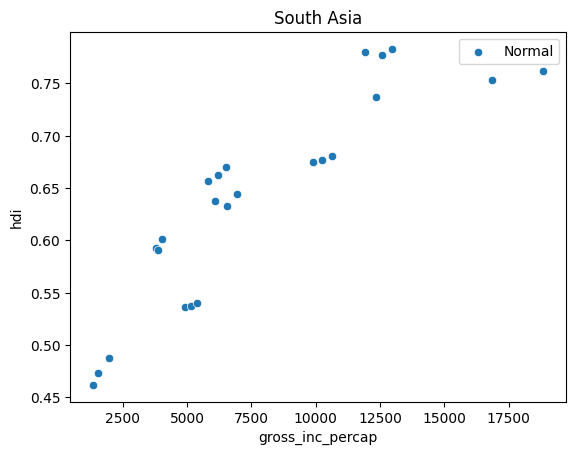

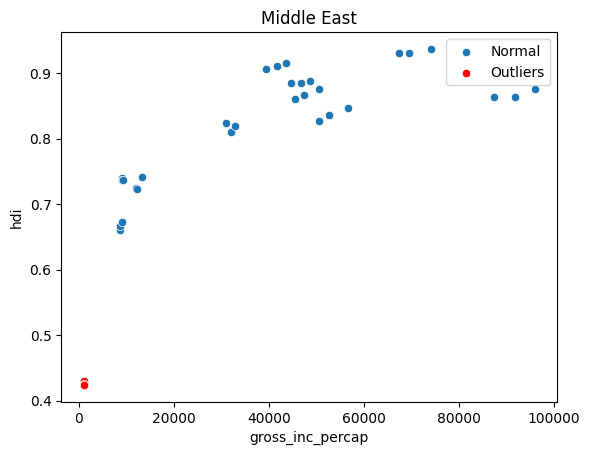

In [126]:

for name, d in [('South Asia',sa_1b),('Middle East',me_1b)]:
    Q1, Q3 = d['hdi'].quantile([0.25,0.75])
    IQR = Q3 - Q1
    out = d[(d['hdi'] < Q1-1.5*IQR) | (d['hdi'] > Q3+1.5*IQR)]
    sns.scatterplot(data=d, x='gross_inc_percap', y='hdi', label='Normal')
    sns.scatterplot(data=out, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
    plt.title(name)
    plt.show()
